# Initialization


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
import warnings
from sklearn.exceptions import DataConversionWarning


Hiding data conversion warnings generated by standard scaler.
Standard scaler expects float as input and converts input to float throwing a warning message.

In [2]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


Reading part (1/n) of the data

In [3]:
def skiprow(i, n):
    if i % n == 0:
       return False
    return True


Change n to load more, or less of the data.

In [4]:
n=100
train_url='https://github.com/shobhitshah/MNIST-digit-recognizer/blob/develop/data/mnist-in-csv/mnist_train.csv.zip?raw=true'
test_url='https://github.com/shobhitshah/MNIST-digit-recognizer/blob/develop/data/mnist-in-csv/mnist_test.csv.zip?raw=true'
train = pd.read_csv(train_url, compression='zip', skiprows = lambda x: skiprow(x, n))
test = pd.read_csv(test_url, compression='zip' , skiprows = lambda x: skiprow(x, 1))

train.shape

(600, 785)

In [5]:
train.sample(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
577,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature selection

In [6]:
y_train=train.label.values
X_train=train.drop('label', axis=1).values
X_test = test.drop('label', axis=1).values
y_test = test.label.values

# Define models

Multi label models.

In [7]:
models = []
models.append(('KNN', KNeighborsClassifier(5)))


# Model fitting and prediction

In [8]:
def model_score(name, model, X_test, y_test):
    #print("Generating score for classifier... "+name)
    score = model.score(X_test, y_test)
    print('Model score: ', score)
    return score

## Comparaing model performance on scaled and unscaled features
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [9]:
def cv_fit_and_predict(models, X_train, y_train, X_test, y_test):
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = []
    #train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
    for name, model in models:
        print("Processing model: ", name)
        clf = make_pipeline(StandardScaler(), model)
        print("Processing model: ", name+"_U")
        for train, val in kfold.split(X_train, y_train):
            model.fit(X_train[train], y_train[train])
            cv_score = model_score(name, model, X_train[val], y_train[val])
            print("Validation score for classifier... ", cv_score)

        print("Generating test scores for classifier... ")
        score = model_score(name, clf, X_test, y_test)
        results.append((name, score))
        score = model_score(name+"_U", model, X_test, y_test)
        results.append((name+"_U", score))
    print("Done")
    return results


In [10]:
results = cv_fit_and_predict(models, X_train, y_train, X_test, y_test)

Processing model:  KNN
Processing model:  Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])
Model score:  0.8629032258064516
Validation score for classifier...  0.8629032258064516
Model score:  0.8347107438016529
Validation score for classifier...  0.8347107438016529
Model score:  0.8833333333333333
Validation score for classifier...  0.8833333333333333
Model score:  0.7815126050420168
Validation score for classifier...  0.7815126050420168
Model score:  0.7672413793103449
Validation score for classifier...  0.7672413793103449
Processing model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
Model score:  0.903225806

# Validation and results

In [11]:
np_results=np.array(results, object)

In [16]:
def model_validation(results):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.boxplot(results[:,1])
    ax.set_xticklabels(results[:,0])
    ax.set_title('Model score')
    plt.show()
    
    return 0

Compare results for models and unscaled models (with _U).

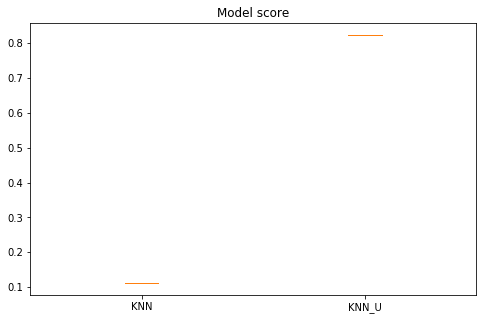

In [17]:
status = model_validation(np_results)